In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/hog_train.csv', header=None)

X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MLPClassifier(solver='adam',
                    activation='relu',
                    alpha=.001,
                    hidden_layer_sizes=(512, 128, 10),
                    random_state=1,
                    max_iter=500)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
train_accuracy = np.mean(train_pred == y_train)

test_pred = clf.predict(X_test)
test_accuracy = np.mean(test_pred == y_test)

print("Training accuracy: {}".format(train_accuracy))
print("Testing accuracy: {}".format(test_accuracy))

Training accuracy: 1.0
Testing accuracy: 0.9804166666666667


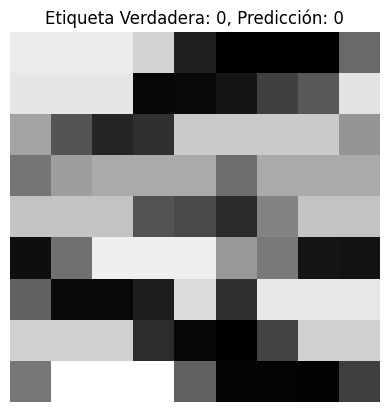

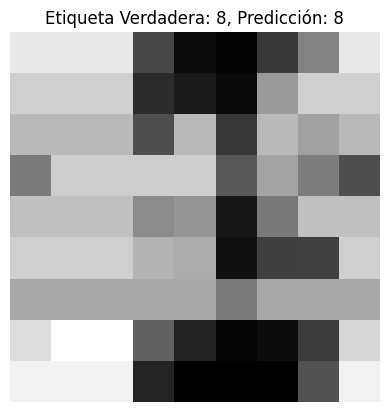

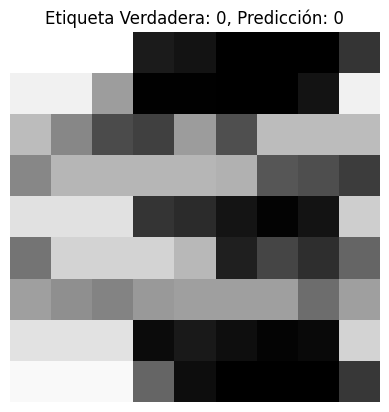

In [11]:
import random

random_indices = random.sample(range(len(X_test)), 3)
random_images = X_test[random_indices]
random_labels = y_test[random_indices]

random_predictions = clf.predict(random_images)

for i in range(3):
    image_side = int(np.sqrt(random_images[i].size))
    image = random_images[i].reshape(image_side, image_side)

    plt.imshow(image, cmap='gray')
    plt.title(f"Etiqueta Verdadera: {random_labels[i]}, Predicción: {random_predictions[i]}")
    plt.axis('off')
    plt.show()

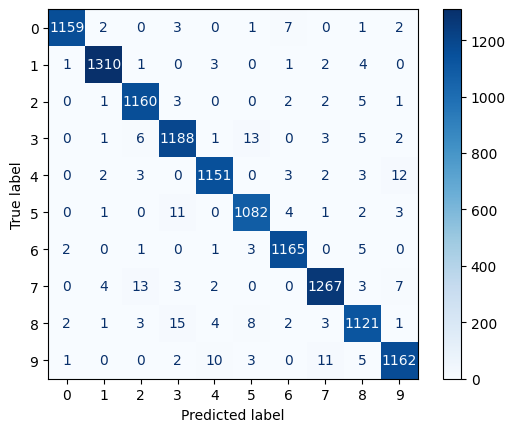

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
import pickle
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

model_filename = '/content/drive/MyDrive/mlp_model.pkl'
with open(model_filename, 'rb') as file:
    sklearn_model = pickle.load(file)

n_features = sklearn_model.coefs_[0].shape[0]

initial_type = [('float_input', FloatTensorType([None, n_features]))]
onnx_model = convert_sklearn(sklearn_model, initial_types=initial_type)

onnx_model_filename = '/content/drive/MyDrive/mlp_model.onnx'
with open(onnx_model_filename, 'wb') as file:
    file.write(onnx_model.SerializeToString())

print("Modelo ONNX guardado en: {}".format(onnx_model_filename))


Modelo ONNX guardado en: /content/drive/MyDrive/mlp_model.onnx


In [ ]:
!pip install tf2onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.4
    Uninstalling protobuf-4.25.4:
      Successfully uninstalled protobuf-4.25.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnxconverter-common 1.14.0 requires protobuf==3.20.2, but you have protobuf 3.20.3 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 which is incompatible.


In [ ]:
!python -m tf2onnx.convert --opset 13 --onnx /content/drive/MyDrive/mlp_model.onnx --output /content/drive/MyDrive/mlp_model_tf.pb


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
usage: convert.py [-h] [--input INPUT] [--graphdef GRAPHDEF] [--saved-model SAVED_MODEL]
                  [--tag TAG] [--signature_def SIGNATURE_DEF]
                  [--concrete_function CONCRETE_FUNCTION] [--checkpoint CHECKPOINT]
                  [--keras KERAS] [--tflite TFLITE] [--tfjs TFJS] [--large_model]
                  [--output OUTPUT] [--inputs INPUTS] [--outputs OUTPUTS]
                  [--ignore_default IGNORE_DEFAULT] [--use_default USE_DEFAULT]
                  [--rename-inputs RENAME_INPUTS] [--rename-outputs RENAME_OUTPUTS]
                  [--use-graph-names] [--opset OPSET] [--dequantize] [--custom-ops CUSTOM_OPS]
                  [--extra_opset EXTRA_OPSET] [--load_op_libraries LOAD_OP_LIBRARIES]
                  [--tar

In [ ]:
import tensorflow as tf

saved_model_dir = "/content/drive/MyDrive/mlp_model_tf"
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

tflite_model_filename = '/content/drive/MyDrive/mlp_model.tflite'
with open(tflite_model_filename, 'wb') as file:
    file.write(tflite_model)

print("Modelo TensorFlow Lite guardado en: {}".format(tflite_model_filename))


Modelo TensorFlow Lite guardado en: /content/drive/MyDrive/mlp_model.tflite
